In [1]:
import os

# 假设文件夹的路径是 "./files"，这表示当前目录下的名为files的文件夹
folder_path = './glog_files'

# 使用os.listdir()获取文件夹内所有文件和文件夹的名称
file_names = os.listdir(folder_path)

# 如果你只想要文件，不想要子文件夹的名字，可以进一步过滤
file_paths = ["glog_files/"+  file for file in file_names if os.path.isfile(os.path.join(folder_path, file))]

file_paths

['glog_files/send_pcap_log_100000_20240328_150947.txt',
 'glog_files/send_pcap_log_100000_20240328_163451.txt',
 'glog_files/send_pcap_log_10000_20240328_123904.txt',
 'glog_files/send_pcap_log_10000_20240328_145136.txt',
 'glog_files/send_pcap_log_1000_20240328_092832.txt',
 'glog_files/send_pcap_log_1000_20240328_152443.txt',
 'glog_files/send_pcap_log_1000_20240329_104307.txt',
 'glog_files/send_pcap_log_1000_20240329_105515.txt',
 'glog_files/send_pcap_log_1000_20240331_103106.txt',
 'glog_files/send_pcap_log_1000_20240331_172059.txt',
 'glog_files/send_pcap_log_1000_20240331_185113.txt',
 'glog_files/send_pcap_log_100_20240328_154020.txt',
 'glog_files/send_pcap_log_5000_20240328_101717.txt',
 'glog_files/send_pcap_log_5000_20240328_113135.txt',
 'glog_files/send_pcap_log_5000_20240331_082427.txt',
 'glog_files/send_pcap_log_5000_20240331_083441.txt',
 'glog_files/send_pcap_log_5000_20240331_084454.txt',
 'glog_files/send_pcap_log_5000_20240331_085506.txt',
 'glog_files/send_pcap_

In [2]:

# 重置变量
total_packets = 0
total_bytes = 0
rates_mbps = []

# 解析日志文件，修正错误
for file_path in file_paths:
    with open(file_path, 'r') as file:
        for line in file:
            if "Actual:" in line:
                parts = line.split()
                packets = int(parts[1])
                # 移除字节数中的括号并转换
                bytes_sent = int(parts[3].replace("(", "").replace(")", ""))
                total_packets += packets
                total_bytes += bytes_sent
            elif "Rated:" in line:
                parts = line.split(",")
                # 提取并处理Mbps速率
                rate_mbps = float(parts[1].strip().split()[0])
                rates_mbps.append(rate_mbps)

# 重新计算总平均速率和最大速率
average_rate_mbps = sum(rates_mbps) / len(rates_mbps)
max_rate_mbps = max(rates_mbps)

(total_packets, total_bytes, average_rate_mbps, max_rate_mbps)


(2060915167, 890044759668, 376.1612823504462, 1184.23)

In [3]:
# 重置全局变量
results = []

# 对每个文件单独进行解析和统计
for file_path in file_paths:
    with open(file_path, 'r') as file:
        local_total_packets = 0
        local_total_bytes = 0
        local_rates_mbps = []
        for line in file:
            if "Actual:" in line:
                parts = line.split()
                packets = int(parts[1])
                bytes_sent = int(parts[3].replace("(", "").replace(")", ""))
                local_total_packets += packets
                local_total_bytes += bytes_sent
            elif "Rated:" in line:
                parts = line.split(",")
                rate_mbps = float(parts[1].strip().split()[0])
                local_rates_mbps.append(rate_mbps)
        # 计算每个文件的平均和最大速率
        average_rate = sum(local_rates_mbps) / len(local_rates_mbps) if local_rates_mbps else 0
        max_rate = max(local_rates_mbps) if local_rates_mbps else 0
        results.append((file_path, local_total_packets, local_total_bytes, average_rate, max_rate))

results


[('glog_files/send_pcap_log_100000_20240328_150947.txt',
  87548742,
  37677643189,
  471.6277728285087,
  1169.37),
 ('glog_files/send_pcap_log_100000_20240328_163451.txt',
  87548742,
  37677643189,
  446.544521158129,
  978.14),
 ('glog_files/send_pcap_log_10000_20240328_123904.txt',
  82800573,
  36918819854,
  128.8326008968609,
  315.99),
 ('glog_files/send_pcap_log_10000_20240328_145136.txt',
  87548742,
  37677643189,
  454.25692650334105,
  1116.78),
 ('glog_files/send_pcap_log_1000_20240328_092832.txt',
  87548742,
  37677643189,
  126.00082405345209,
  472.07),
 ('glog_files/send_pcap_log_1000_20240328_152443.txt',
  87548742,
  37677643189,
  460.04443207126957,
  993.13),
 ('glog_files/send_pcap_log_1000_20240329_104307.txt',
  87548742,
  37677643189,
  409.7998440979957,
  954.93),
 ('glog_files/send_pcap_log_1000_20240329_105515.txt',
  87548742,
  37677643189,
  407.2076614699332,
  997.59),
 ('glog_files/send_pcap_log_1000_20240331_103106.txt',
  87548742,
  376776431

In [4]:
import matplotlib.pyplot as plt

# 重置用于存储结果的列表
results_with_duration = []

# 对每个文件单独进行解析和统计，这次包括总用时
for file_path in file_paths:
    with open(file_path, 'r') as file:
        local_total_duration = 0.0  # 存储每个文件的总用时
        for line in file:
            if "Actual:" in line:
                parts = line.split()
                # 提取并累加用时
                duration = float(parts[-2])
                local_total_duration += duration
        # 将总用时添加到对应的结果中
        results_with_duration.append(local_total_duration)

# 更新绘图数据
durations = results_with_duration
durations

[598.6069550000001,
 626.9849130000002,
 2135.7295989999993,
 622.635971,
 2325.452149,
 612.5627029999997,
 689.9379140000001,
 692.7334389999996,
 674.4161130000006,
 572.77,
 573.87,
 3012.074848999999,
 2305.761599999997,
 2216.3110740000006,
 579.5905919999994,
 579.3324519999993,
 578.0003509999997,
 581.2322139999998,
 580.4865360000001,
 651.6273850000001,
 670.8160140000001,
 578.5,
 532.8903299999998,
 658.082771]

In [5]:
# 准备数据
transfers = [file_name.split('_')[-2][6:] + '_' + file_name.split('_')[-1][:6] for file_name in file_paths]
transfers

['28_150947',
 '28_163451',
 '28_123904',
 '28_145136',
 '28_092832',
 '28_152443',
 '29_104307',
 '29_105515',
 '31_103106',
 '31_172059',
 '31_185113',
 '28_154020',
 '28_101717',
 '28_113135',
 '31_082427',
 '31_083441',
 '31_084454',
 '31_085506',
 '31_090521',
 '31_100049',
 '31_101601',
 '31_171118',
 '30_211305',
 '29_102807']

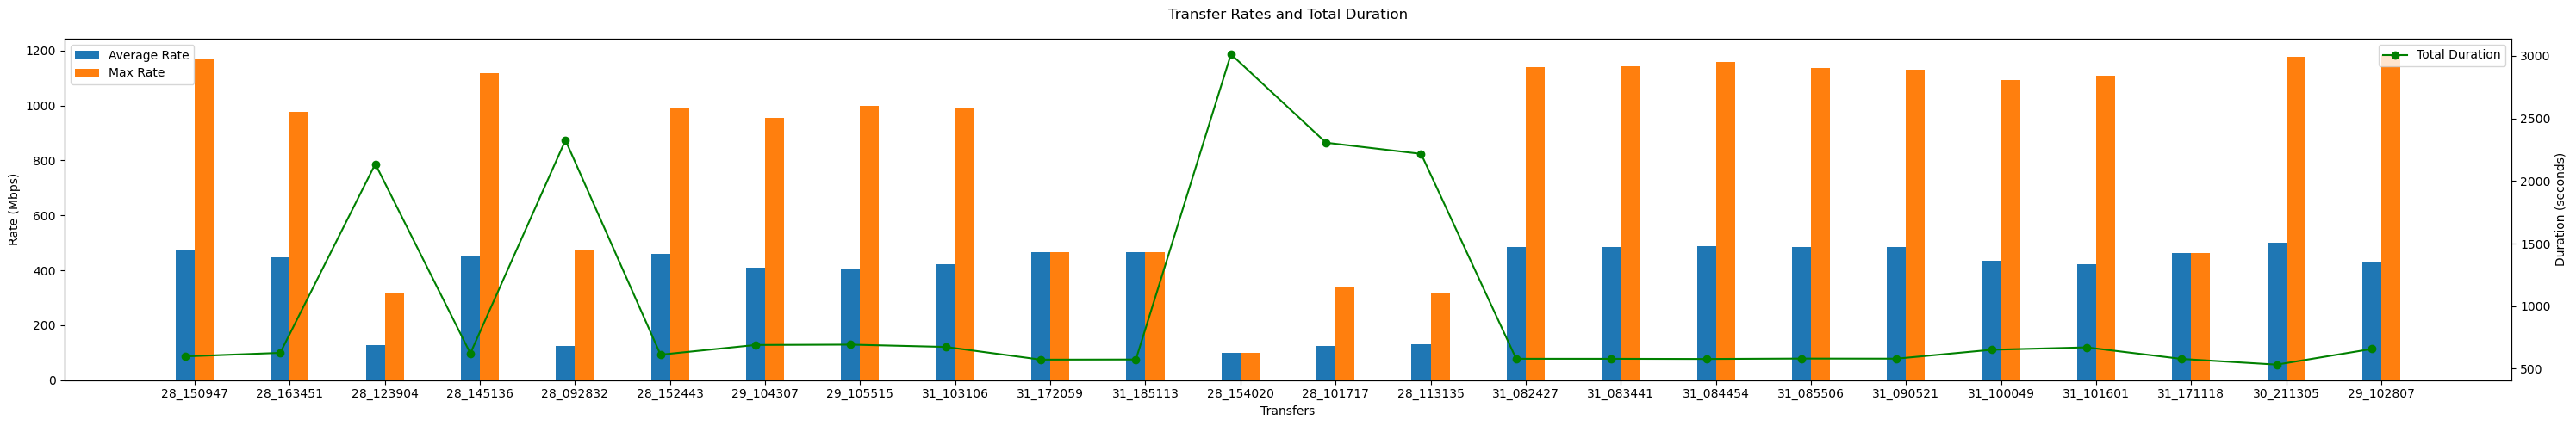

In [6]:
# 准备数据
average_rates = [result[3] for result in results]
max_rates = [result[4] for result in results]

# 设置柱状图的位置和宽度
index = range(len(transfers))
bar_width = 0.2

# 绘制图表，包括平均速率、最大速率和总用时
fig, ax1 = plt.subplots(figsize=(30, 5))

# 绘制平均速率和最大速率的柱状图
ax1.set_xlabel('Transfers')
ax1.set_ylabel('Rate (Mbps)')
ax1.bar(index, average_rates, bar_width, label='Average Rate')
ax1.bar([p + bar_width for p in index], max_rates, bar_width, label='Max Rate')
ax1.set_xticks([p + bar_width / 2 for p in index])
ax1.set_xticklabels(transfers)
ax1.legend(loc='upper left')

# 创建第二个y轴来绘制总用时的折线图
ax2 = ax1.twinx()
ax2.set_ylabel('Duration (seconds)')
ax2.plot(transfers, durations, color='green', marker='o', label='Total Duration')
ax2.legend(loc='upper right')

# 设置标题
fig.suptitle('Transfer Rates and Total Duration')

fig.tight_layout()
plt.show()


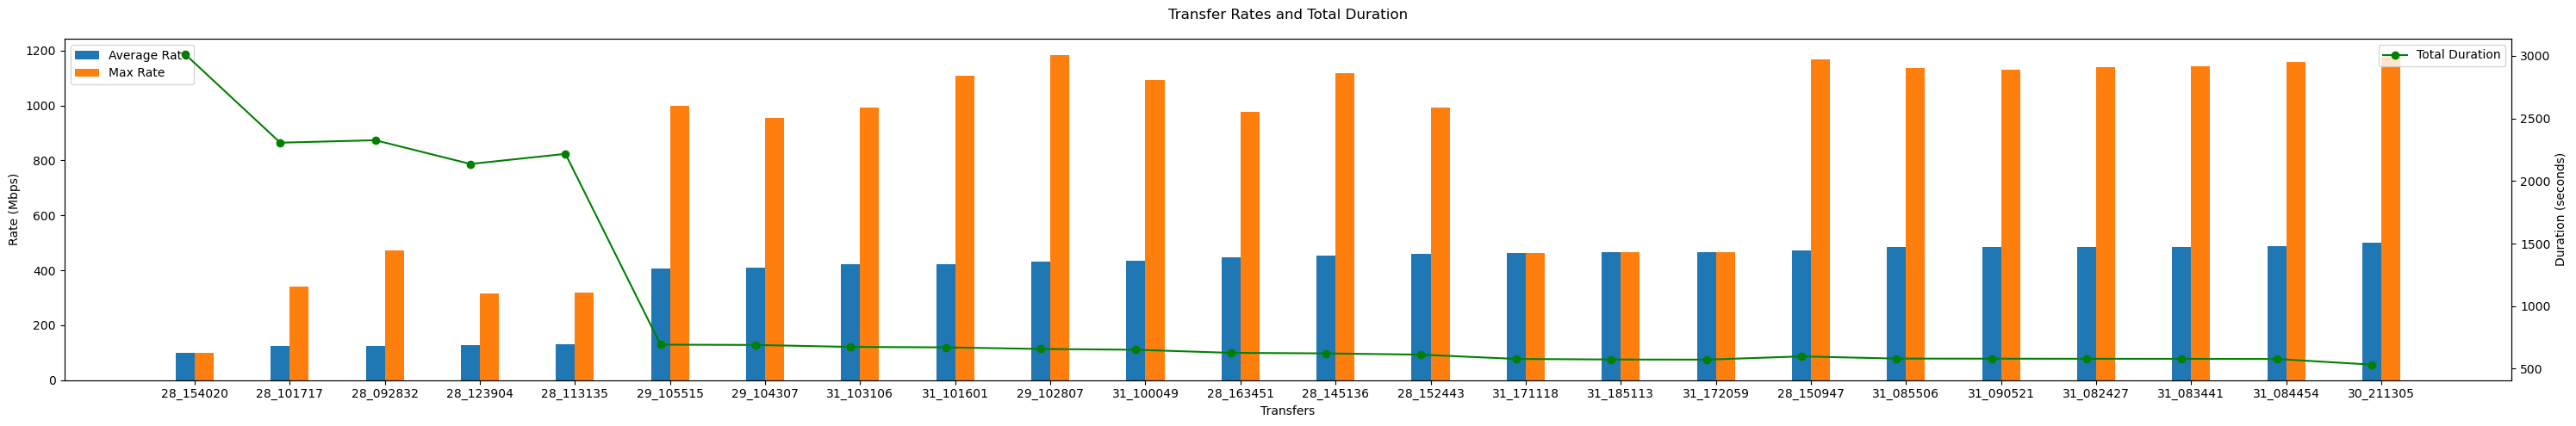

In [7]:
# 假设average_rates, max_rates, transfers, durations等数据已经准备好

# 将相关的列表组合起来，以便基于平均速率进行排序
combined = list(zip(average_rates, max_rates, transfers, durations))

# 对组合后的列表进行排序，这里以average_rates为基准进行排序
# 如果你想根据最大速率排序，可以将combined.sort()中的lambda函数改为lambda x: x[1]
combined_sorted = sorted(combined, key=lambda x: x[0])

# 将排序后的数据解压回原来的列表
average_rates, max_rates, transfers, durations = zip(*combined_sorted)

# 以下是绘图部分，这部分代码保持不变，只是现在使用的是排序后的数据
index = range(len(transfers))
bar_width = 0.2

fig, ax1 = plt.subplots(figsize=(30, 5))

ax1.set_xlabel('Transfers')
ax1.set_ylabel('Rate (Mbps)')
ax1.bar(index, average_rates, bar_width, label='Average Rate')
ax1.bar([p + bar_width for p in index], max_rates, bar_width, label='Max Rate')
ax1.set_xticks([p + bar_width / 2 for p in index])
ax1.set_xticklabels(transfers)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.set_ylabel('Duration (seconds)')
ax2.plot(transfers, durations, color='green', marker='o', label='Total Duration')
ax2.legend(loc='upper right')

fig.suptitle('Transfer Rates and Total Duration')

fig.tight_layout()
plt.show()
